In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection,decomposition, tree, metrics

In [ ]:

#Funções

def implementy_classyfication_model(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred


def plot_correlation_matrix(matrix):
  tn, fp, fn, tp = matrix.ravel()
  fig = plt.figure(figsize=(5, 5))

  labels = np.array([
      [f"TN = {tn}", f"FP = {fp}"],
      [f"FN = {fn}", f"TP = {tp}"]
  ])

  sns.heatmap(matrix, annot = labels, fmt='', cmap='Greens', cbar=False)
  plt.title('Matriz de confusão')
  plt.ylabel('Classe real')
  plt.xlabel('Classe predita')
  plt.xticks([0.5, 1.5], ["Negativo", "Positivo"])
  plt.yticks([0.5, 1.5],["Negativo", "Positivo"], rotation=0)
  plt.tight_layout()
  plt.show()


def evaluation_metrics(y_test, y_pred):
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1_score = metrics.f1_score(y_test, y_pred)
  return accuracy, precision, recall, f1_score

#### Pré processamento

In [ ]:
random_seed = 28
np.random.seed(random_seed)
lb = preprocessing.LabelEncoder()

#Carregando o Dataset
df_titanic = pd.read_csv('https://github.com/cassiusf/datasets/raw/refs/heads/main/titanic_data.csv')

#Eliminando as variáveis “PassengerId”, “Name”, “Ticket” e “Cabin”
df_new = df_titanic.drop(columns=['PassengerId', 'Name', 'Ticket','Cabin'])

#Eliminando observações que contenham dados ausentes (NA)
df_cleaned = df_new.dropna().copy()

#Aplicando o LabelEncoder nas variáveis “Embarked” e “Sex”
df_cleaned['Embarked'] = lb.fit_transform(df_cleaned['Embarked'])
df_cleaned['Sex'] = lb.fit_transform(df_cleaned['Sex'])

#Separando o dataframe resultante em Treino-Teste, utilizando a proporção 80-20%.
features = df_cleaned.drop(columns=['Survived'])
target = df_cleaned['Survived']
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size=0.2, random_state=random_seed)
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


#### Aplicando modelo simples

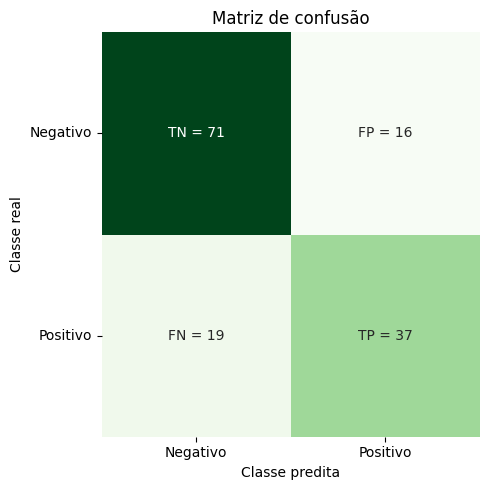



Acurácia: 75.52%


Precisão: 0.70, Recall: 0.66, F1-score: 0.68


In [ ]:
# Aplicando um modelo de árvore de decisão simples
simple_model = tree.DecisionTreeClassifier(random_state=random_seed)
predict_sm = implementy_classyfication_model(simple_model, X_train, y_train, X_test)

#Criando uma matriz de confusão com o resultado da aplicação do modelo no conjunto de testes
matrix_sm= metrics.confusion_matrix(y_test, predict_sm)

#Apresentando os valores encontrados para as medidas TN, TP, FN e FP

plot_correlation_matrix(matrix_sm)


#Apresentando a acurácia do modelo
accuracy, precision, recall, f1_score = evaluation_metrics(y_test, predict_sm)
print(f"\n\nAcurácia: {accuracy * 100:.2f}%")

#Apresentando as métricas precision, recall e F1-score do modelo
print(f"\n\nPrecisão: {precision:.2f}, "
      f"Recall: {recall:.2f}, "
      f"F1-score: {f1_score:.2f}")

#### Busca Melhor Hiperparâmetro (MAX DEPTH)

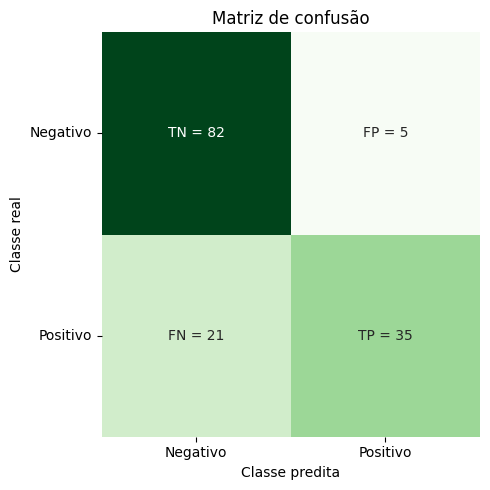



Profundidade 4:
Acurácia: 81.82%
Precisão: 0.88, Recall: 0.62, F1-score: 0.73


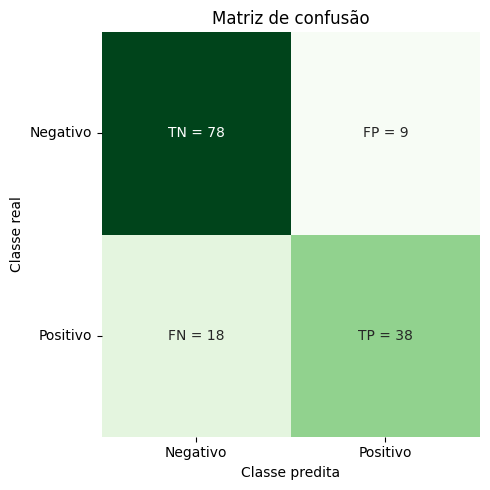



Profundidade 7:
Acurácia: 81.12%
Precisão: 0.81, Recall: 0.68, F1-score: 0.74


In [ ]:
#Testa duas novas profundidades
model_depth_1 = tree.DecisionTreeClassifier(random_state=random_seed, max_depth=4)
model_depth_2 = tree.DecisionTreeClassifier(random_state=random_seed, max_depth=7)

models = [model_depth_1, model_depth_2]

#Novas  métricas alcançadas
for model in models:
    predict_model = implementy_classyfication_model(model, X_train, y_train, X_test)

    matrix = metrics.confusion_matrix(y_test, predict_model)
    plot_correlation_matrix(matrix)

    accuracy, precision, recall, f1_score = evaluation_metrics(y_test, predict_model)
    print(f"\n\nProfundidade: {model.max_depth}")
    print(f"Acurácia: {accuracy * 100:.2f}%")
    print(f"Precisão: {precision:.2f}, "
          f"Recall: {recall:.2f}, "
          f"F1-score: {f1_score:.2f}")

#### Visualizações das Árvores

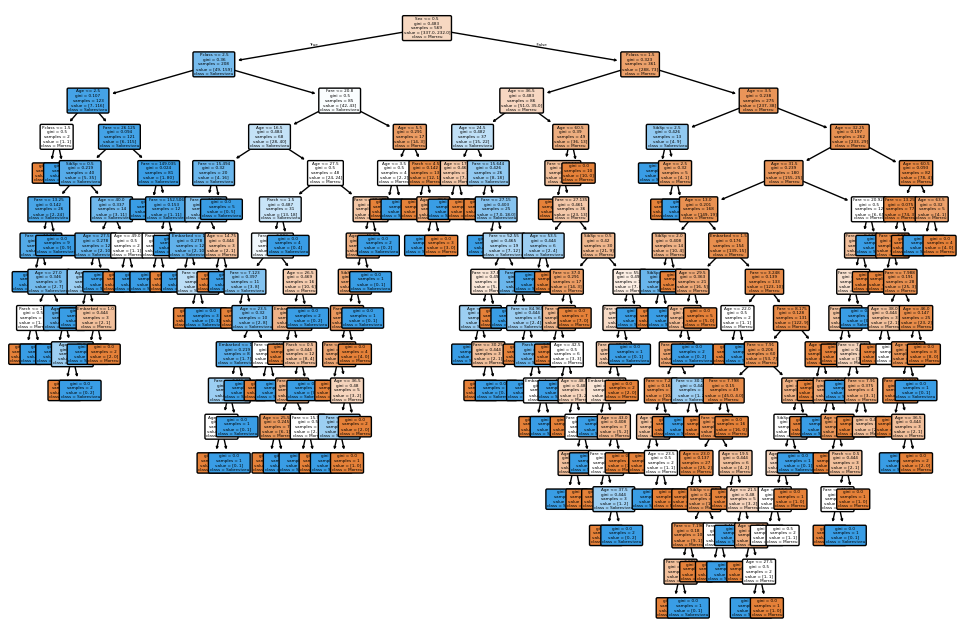

In [ ]:
#Apresentando as visualizações da árvore original
plt.figure(figsize=(12,8))

tree.plot_tree(
    simple_model,
    feature_names=features.columns,
    class_names=['Morreu', 'Sobreviveu'],
    filled=True,
    rounded=True,
    fontsize= 3
)
plt.show()


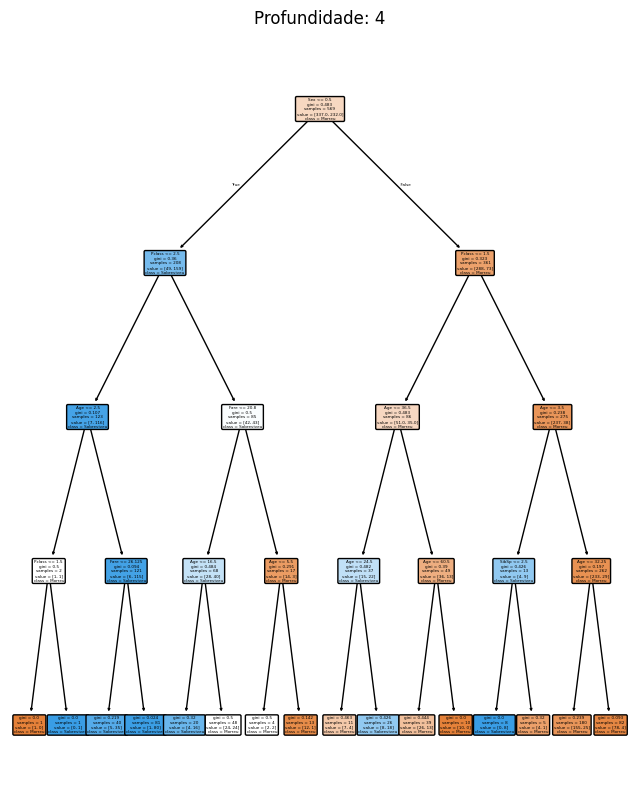

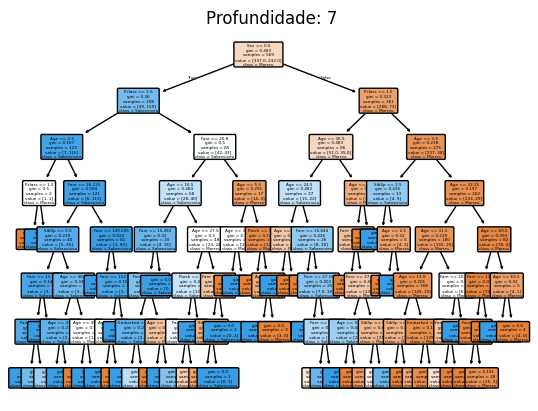

In [ ]:
#Apresentando as visualizações das duas árvores criadas na questão 3

plt.figure(figsize=(8,10))
for model in models:
  tree.plot_tree(
      model,
      feature_names=features.columns,
      class_names=['Morreu', 'Sobreviveu'],
      filled=True,
      rounded=True,
      fontsize= 3
  )
  plt.title(f"Profundidade: {model.max_depth}")
  plt.show()